# Instructions

Read carefully all the content in the cells, including the comments in the code cells

Some lines of code have been removed. You are asked to fill in the gaps.

Only modify lines that are between the following promts:

'# START YOUR CODE HERE >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

'# >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE

After each cell there will be a test cell that will allow you to be confident you will be able to continue with the execution of the notebook.

Here's an example

In [1]:
# This is just a test to illustrate how we will do exercises with jupyter notebooks

# This function adds two numbers and prints the result
# Please fill in the gaps

def print_sum(a,b):
    
    # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
    c = a + b
    # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
    
    print(c)
    
    return

In [2]:
# Run this cell to check that the above implementation is correct
print_sum(1,2)

3


**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>** print_sum(1,2) **</td> 
        <td>3 </td> 
    </tr>

</table>

# Object-oriented programming

Object-oriented programming (OOP) is a programming paradigm in which programs are built around objects, not functions. Each object can have properties, and methods that can be applied to that object. It is a paradigm that can be useful in many instances, since it allows to put together data and methods applied to this data. It also allows for a compact syntax. 

In Python, this paradigm is implemented through classes. We will build our own class to handle cosmological models.

But first, let's learn briefly about the Python syntax for a class, and how to use it.

In [3]:
# A class should describe a type of objects, and those objects will typically
# be define by a set of attributes

class Person:
    name = 'Clara'
    
# And once defined, we can create objects by calling the class
laura = Person()

# We can check that we have created a person
print(type(laura))

<class '__main__.Person'>


In [4]:
# To access the attributes we do
print("Name = {}".format(laura.name))

Name = Clara


In [5]:
# Of course, if we try to access an attribute that is not defined
# we should get an error message
print(laura.age)

AttributeError: 'Person' object has no attribute 'age'

In [6]:
# We can create a new person
john = Person()
print("New name = {}".format(john.name))

New name = Clara


In [7]:
# It would be nice to be able to define the values of the attributes when creating
# an object. This is done with a special method (function) defined inside the class
# called a constructor:

class Person:
    def __init__(self, name):
        self.name = name
        
# 'self' refers to the object itself, and needs to be passed as an argument
# Now we can create people by invoking the constructor
laura = Person(name='Laura')
john  = Person(name='John')
print("Laura's name is {}".format(laura.name))
print("John's name is {}".format(john.name))

Laura's name is Laura
John's name is John


In [8]:
# It is possible to give default values to some of the parameters in the constructors

class Person:
    def __init__(self, name, alive=True):
        self.name  = name
        self.alive = alive
        
laura = Person(name='Laura')
print("Laura's name is {}".format(laura.name))
print("Is Laura alive? : {}".format(laura.alive))

Laura's name is Laura
Is Laura alive? : True


In [9]:
# It is possible to update the parameters of an object once created
# (warning, this is probably a bad/sad example)
laura = Person(name='Laura')

print("Laura's name is {}".format(laura.name))
print("Is Laura alive? : {}".format(laura.alive))

laura.alive = False

print("Is Laura alive? : {}".format(laura.alive))

Laura's name is Laura
Is Laura alive? : True
Is Laura alive? : False


In [10]:
# There are ways to protect attributes from being accessed to (and changed)
# directly, but we do not need to worry about that

# We can also add functions that use the class attributes and new outputs
# For instance, imagine you are a bank

class Person:
    def __init__(self, name, balance=0):
        self.name    = name
        self.balance = balance
        
    def update_balance(self, amount):
        self.balance = self.balance + amount
        
    def is_in_debt(self):
        if self.balance < 0 :
            return True
        else:
            return False
        
# Let's create an objet with an initial account balance
laura = Person(name='Laura', balance = 234)

# Let's check that account balance, and whether it is in debt
print("{} current balance : {}".format(laura.name, laura.balance))
print("Is {} in debt? : {}".format(laura.name, laura.is_in_debt()))
print()

# We can update the balance
laura.update_balance(-567)

# And check again if it is in balance
print("Is {} in debt? : {}".format(laura.name, laura.is_in_debt()))
print("{} current balance : {}".format(laura.name, laura.balance))

Laura current balance : 234
Is Laura in debt? : False

Is Laura in debt? : True
Laura current balance : -333


# Cosmological model with multiple components

Now that we understand how classes work, we are going to create a class to handle cosmologies that are described by the FLRW equation.

As we have seen in class, we are going to take into consideration cosmologies with four possible components:

1. Non-relativistic matter: determined by the current energy density in units of the critical density, $\Omega_{m,0}$

2. Radiation: determined by the current energy density in units of the critical density, $\Omega_{r,0}$

3. Cosmological constant: determined by the current energy density in units of the critical density, $\Omega_{\Lambda,0}$

4. Curvature: determined by the current energy density in units of the critical density, $\Omega_{\kappa,0}$

We also want to be able to define the current value of the Hubble constant, since we will use that value to normalize all the equations that will allow us to compute the time evolution of the universes described by this model.

Since each component's energy density scale differently with the scale factor, the first thing we want to implement is that scaling, so that we can compute the energy density from a given component at any given time.

$$\Omega_m = \frac{\Omega_{m,0}}{a^3}$$
$$\Omega_r = \frac{\Omega_{r,0}}{a^4}$$
$$\Omega_l = \Omega_{l,0}$$
$$\Omega_{\kappa} = \frac{\Omega_{\kappa,0}}{a^2}$$

Also, energy densities are additive, so we can get the total energy density

$$\Omega = \Omega_m + \Omega_r + \Omega_l + \Omega_{\kappa}$$

In [11]:
import astropy.units as u           # we will use this library to handle units
from astropy.constants import c     # speeed of light
from scipy.integrate import quad    # only needed if we use quad function for integral
import numpy as np

class FLRWcosmo:
    '''Class for cosmological model representing a uniform and isotropic universe described by GR'''
    
    def __init__(self, Om_0, Or_0, Ol_0, H_0=72*u.km/u.s/u.Mpc):
        # Since the uncertainty on the Hubble constant is not too big, we can 
        # add a default value for it
        # Feel free to modify the class and add default values for your favourite model
        self.Om_0 = Om_0
        self.Or_0 = Or_0
        self.Ol_0 = Ol_0
        self.Ok_0 = 1 - self.Om_0 - self.Or_0 - self.Ol_0
        self.H_0  = H_0
        
        # Derived parameters that will be used to normalize distances
#        from astropy.constants import c
        self.t_H = (1 / self.H_0).to(u.Gyr).value     # Hubble time in Gyr
        self.D_H = (c / self.H_0).to(u.Mpc).value   # Hubble radius in Mpc
        
    # Scaling of enery densities per component at scale factor a
    def Om(self, a):
        '''Non-relativistic matter energy density in units of critical density at a=1'''       
        omega_m = self.Om_0 / a**3 
        return omega_m
    
    def Or(self, a):
        '''Radiation energy density in units of critical density at a=1'''
        # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
        omega_r = self.Or_0 / a**4
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        return omega_r
    
    def Ol(self, a):
        '''Cosmological constant energy density in unist of critical density at a=1'''
        # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
        omega_l = self.Ol_0 
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        return omega_l
    
    def Ok(self, a):
        '''Curvature energy density in units of critical density at a=1'''
        # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
        omega_k = self.Ok_0 / a**2
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        return omega_k
    
    def Omega(self, a):
        '''Total energy density in units of critical density at a=1'''
        # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
        omega = self.Om(a) + self.Or(a) + self.Ol(a) + self.Ok(a)
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        return omega
    
    def E(self, a):
        '''Square root of energy density, enters Friedmann's equation'''
        
        E = self.Omega(a)**0.5
        
        return E

In [12]:
# Let's test the class
cosmo = FLRWcosmo(Om_0=0.3, Or_0=0, Ol_0=0.7)
print(cosmo.Omega(0.5))

3.0999999999999996


**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>**print(cosmo.Omega(0.5)) **</td> 
        <td>3.0999999999999996</td> 
    </tr>

</table>

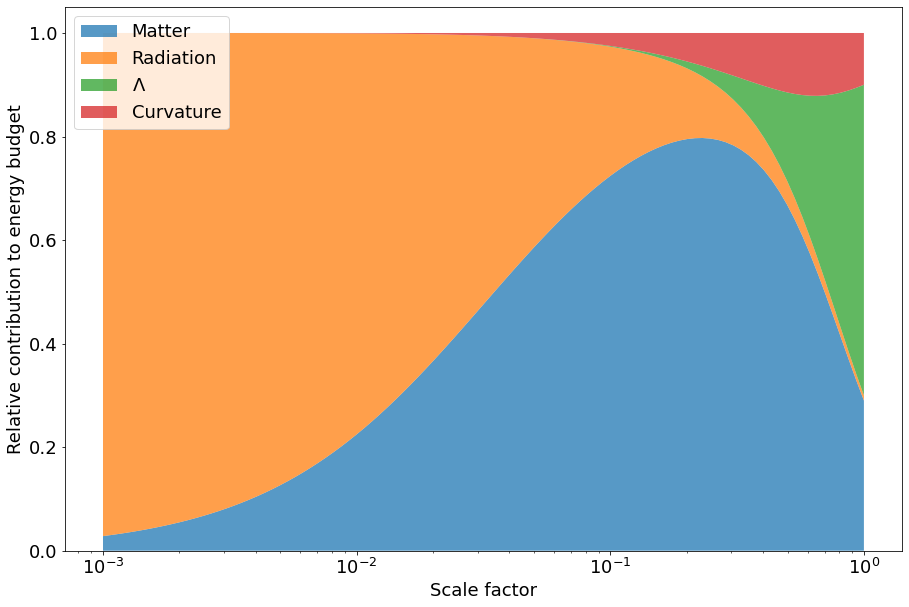

In [13]:
# Let's use this cosmology class to figure out how different components 
# contribute to the overall energy budget

# First, let's initialize a cosmology
cosmo = FLRWcosmo(Om_0=0.29, Or_0=0.01, Ol_0=0.60)

# Second, let's define a series of scale factors to do the calculations
import numpy as np   # library to handle arrays
a_s = np.logspace(-3, 0, 100)   # 100 scale factors from 0.001 to 1, spaced logaritmically

# Third, compute the energy densities at those scale factors
# instead of for loops, we use here Python list comprehension, which is more compact
# and we convert the resulting Python lists to arrays
om_m = np.array([cosmo.Om(a) for a in a_s])
om_r = np.array([cosmo.Or(a) for a in a_s])
om_l = np.array([cosmo.Ol(a) for a in a_s])
om_k = np.array([cosmo.Ok(a) for a in a_s])

omega = om_m + om_r + om_l + om_k

# Fourth, normalize them so that we are just looking at their relative weights
om_m_r = om_m / omega
om_r_r = om_r / omega
om_l_r = om_l / omega
om_k_r = om_k / omega

# Finally, we make a plot to show how the balance in the energy budget changes with the scale factor
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(1,1,1)
labels = [r"Matter", r"Radiation", r"$\Lambda$", r"Curvature"]
ax.stackplot(a_s, om_m_r, om_r_r, om_l_r, om_k_r, labels=labels, alpha=0.75)
ax.set_xscale('log')
ax.set_xlabel(r"Scale factor"), ax.set_ylabel(r"Relative contribution to energy budget")
ax.legend(loc=2)

## Friedmann's equation

The other aspect we would like to implement in our cosmology class is how the scale factor evolves with time, that is, the dynamic evolution of these universes: $a(t)$


As we saw in the lecture, computing the inverse relationship, $t(a)$ is straightforward through integration:

$$\chi(a) = \int_0^a \frac{da}{a\sqrt{\Omega(a)}}$$

with

$$\chi = H_0 t$$

Let's add an "age" function to our class that essentially does the above integral.

Feel free to do the integral the way you prefer. I would recommend to use the 'quad' function in the scipy.integrate library:

https://docs.scipy.org/doc/scipy/reference/integrate.html

In [15]:
import astropy.units as u           # we will use this library to handle units
from astropy.constants import c     # speeed of light
from scipy.integrate import quad    # only needed if we use quad function for integral
import numpy as np

class FLRWcosmo:
    '''Class for cosmological model representing a uniform and isotropic universe described by GR'''
    
    def __init__(self, Om_0, Or_0, Ol_0, H_0=72*u.km/u.s/u.Mpc):
        # Since the uncertainty on the Hubble constant is not too big, we can 
        # add a default value for it
        # Feel free to modify the class and add default values for your favourite model
        self.Om_0 = Om_0
        self.Or_0 = Or_0
        self.Ol_0 = Ol_0
        self.Ok_0 = 1 - self.Om_0 - self.Or_0 - self.Ol_0
        self.H_0  = H_0
        
        # Derived parameters that will be used to normalize distances
#        from astropy.constants import c
        self.t_H = (1 / self.H_0).to(u.Gyr).value     # Hubble time in Gyr
        self.D_H = (c / self.H_0).to(u.Mpc).value   # Hubble radius in Mpc
        
    # Scaling of enery densities per component at scale factor a
    def Om(self, a):
        '''Non-relativistic matter energy density in units of critical density at a=1'''       
        omega_m = self.Om_0 / a**3 
        return omega_m
    
    def Or(self, a):
        '''Radiation energy density in units of critical density at a=1'''
        # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
        omega_r = self.Or_0 / a**4
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        return omega_r
    
    def Ol(self, a):
        '''Cosmological constant energy density in unist of critical density at a=1'''
        # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
        omega_l = self.Ol_0 
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        return omega_l
    
    def Ok(self, a):
        '''Curvature energy density in units of critical density at a=1'''
        # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
        omega_k = self.Ok_0 / a**2
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        return omega_k
    
    def Omega(self, a):
        '''Total energy density in units of critical density at a=1'''
        # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
        omega = self.Om(a) + self.Or(a) + self.Ol(a) + self.Ok(a)
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        return omega
    
    def E(self, a):
        '''Square root of energy density, enters Friedmann's equation'''
        
        E = self.Omega(a)**0.5
        
        return E
    
    # Ages
    def age(self, a):
        '''Age of the universe, in Gyr by integrating the Friedman's equation'''
        
        # implement the integral for chi
        def integrand(x):
            '''Computes the integrand, for chi given scale factor x'''
            # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
            integ = 1 / x / self.E(x)
            # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
            
            return integ
        
        # perform the integral
        # START YOUR CODE HERE (1 line of code)>>>>>>>>>>>>>>>>>>
        chi = quad(integrand, 0, a)[0]
        # >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> END YOUR CODE HERE
        
        # scale with Hubble time, bringing back units in Gyr
        
        age = self.t_H * chi
        
        return age

In [16]:
# First, let's test the age function
cosmo = FLRWcosmo(Om_0=0.3, Or_0=0, Ol_0=0.7)
print(cosmo.age(1))

13.09290105954091


**Expected Output**: 
<table style = "width:40%">
    <tr>
    <td>**print(cosmo.age(1)) **</td> 
        <td>13.092901059540912</td> 
    </tr>

</table>

In [17]:
# Now, let' create an interactive plot similar to the one we may have seen in the lecture
# That is, a plot that shows the scale factor as a function of time, compared with a cosmology
# of reference, which we will take as one with parameters that resemble the best fit values
# we have from current datasets

from ipywidgets import interactive   # library to use interactive plot

# let's fix the Hubble constant
import astropy.units as u
H_0 = 72 * u.km / u.s / u.Mpc

# let's fix the scale factors to display
a_s = np.linspace(1e-3, 1, 100)

# create a function to plot a single comology
def f(om_0, or_0, ol_0):
    # initialize a cosmology, and reference
    cosmo      = FLRWcosmo(Om_0=om_0,  Or_0=or_0, Ol_0=ol_0, H_0=H_0)
    cosmo_lcdm = FLRWcosmo(Om_0=0.3089,Or_0=6e-5, Ol_0=1-0.3089-6e-5,    H_0=H_0)
    # integrate Friedmann's equation
    t_s      = np.array([cosmo.age(a)      for a in a_s])
    t_s_lcdm = np.array([cosmo_lcdm.age(a) for a in a_s])
    # create the plot
    matplotlib.rcParams.update({'font.size': 18})
    fig = plt.figure(figsize=(15,10))
    ax  = fig.add_subplot(1,1,1)
    ax.plot(t_s_lcdm, a_s, 'k-',  label=r'$\Lambda$CDM')
    ax.plot(t_s,      a_s, 'b-',  label=r'Cosmology')

    ax.legend(loc=4)
    ax.set_xlabel(r"Time [Gyr]"), ax.set_ylabel(r"Scale factor")
    ax.grid()
    plt.tight_layout()
    plt.show()
    
# Output interactive plot
interactive_plot = interactive(f, om_0=(0.1, 1.0, 0.1), or_0=(1e-6, 1e-4, 1e-6), ol_0=(0,1,0.1))
output           = interactive_plot.children[-1]
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='om_0', max=1.0, min=0.1), FloatSlider(value=4.999999…